### EDA ###

**Imports**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
#original data:
chi_df_og = pd.read_csv('../data/chi_accidents.csv')

In [3]:
chi_df_og.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
chi_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
#cleaned data:
chi_df = pd.read_csv('../data/chi_df_model_ready.csv')

In [6]:
chi_df.head(3)

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night,accident_duration
0,2,1.480517e+09,1.480539e+09,42.305960,-87.960150,42.306916,-87.960918,0.077,0.0,1.480518e+09,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
1,2,1.480518e+09,1.480540e+09,42.175870,-88.135770,42.174620,-88.135794,0.086,21500.0,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21600.0
2,3,1.480519e+09,1.480541e+09,42.175897,-88.135769,42.174612,-88.135794,0.089,21501.0,1.480518e+09,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22524.0


**EDA**

In [7]:
chi_df.columns[:40]

Index(['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'wind_direction_Calm', 'wind_direction_E',
       'wind_direction_ENE', 'wind_direction_ESE', 'wind_direction_East',
       'wind_direction_N', 'wind_direction_NE', 'wind_direction_NNE',
       'wind_direction_NNW', 'wind_direction_NW'],
      dtype='object')

In [8]:
chi_df.shape

(42407, 116)

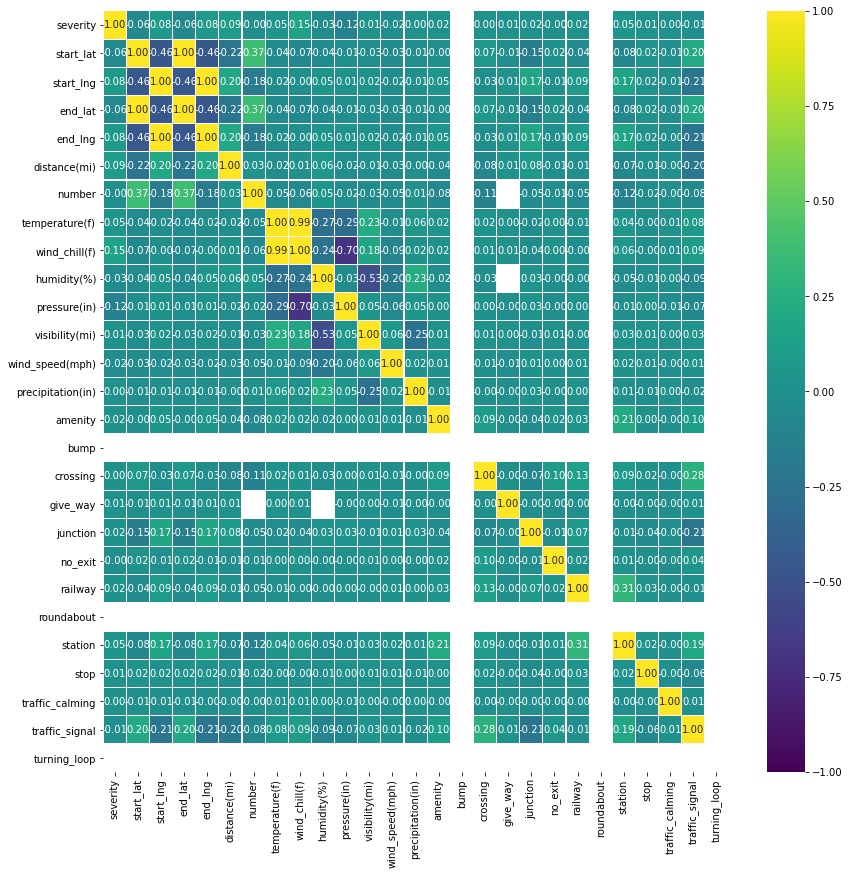

In [9]:
plt.figure(figsize = (14, 14))
sns.heatmap(chi_df_og.corr(),
            annot = True,
            fmt='.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

In [10]:
chi_df.isna().sum().sort_values(ascending = False)

severity                                          0
weather_condition_Light Freezing Fog              0
weather_condition_Light Thunderstorms and Snow    0
weather_condition_Light Thunderstorms and Rain    0
weather_condition_Light Snow and Sleet / Windy    0
                                                 ..
wind_direction_East                               0
wind_direction_ESE                                0
wind_direction_ENE                                0
wind_direction_E                                  0
accident_duration                                 0
Length: 116, dtype: int64

In [11]:
#already addressed null values in cleaning, looking at duplicate values:
chi_df.duplicated(subset = ['severity', 'start_time', 'end_time',
                            'start_lat', 'start_lng','end_lat',
                            'end_lng', 'distance(mi)']).value_counts()

False    41055
True      1352
dtype: int64

In [12]:
duplicate = chi_df.duplicated()
chi_df[duplicate]

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night,accident_duration
5,3,1.480524e+09,1.480545e+09,41.75033,-87.66344,41.75033,-87.66344,0.000,7899.0,1.480524e+09,37.9,30.0,73.0,29.65,10.0,12.7,0.0,False,False,False,False,False,False,False,False,True,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21600.0
506,3,1.481564e+09,1.481585e+09,42.27967,-87.85424,42.27967,-87.85424,0.000,297.0,1.481565e+09,14.0,2.9,84.0,30.11,7.0,8.1,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,21600.0
509,3,1.481564e+09,1.481586e+09,42.41546,-88.10684,42.41546,-88.10684,0.000,24300.0,1.481565e+09,14.0,2.9,84.0,30.11,7.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,21600.0
779,3,1.481910e+09,1.481931e+09,42.41516,-88.09212,42.41516,-88.0921

In [13]:
#HEY TEAM! NOT SURE WHAT TO DO WITH DUPLICATE VALUES! WOULD LOVE YOUR INPUT!
#HEY TEAM! NOT SURE WHAT TO DO WITH DUPLICATE VALUES! WOULD LOVE YOUR INPUT!
#HEY TEAM! NOT SURE WHAT TO DO WITH DUPLICATE VALUES! WOULD LOVE YOUR INPUT!
#HEY TEAM! NOT SURE WHAT TO DO WITH DUPLICATE VALUES! WOULD LOVE YOUR INPUT!
#HEY TEAM! NOT SURE WHAT TO DO WITH DUPLICATE VALUES! WOULD LOVE YOUR INPUT!

In [14]:
chi_df[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().drop('count').T

,mean,std,min,25%,50%,75%,max
severity,2.639187e+00,6.232498e-01,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00
start_time,1.531898e+09,4.451281e+07,1.466174e+09,1.489433e+09,1.528129e+09,1.576864e+09,1.609452e+09
end_time,1.531912e+09,4.450414e+07,1.466196e+09,1.489458e+09,1.528150e+09,1.576865e+09,1.609458e+09
start_lat,4.196166e+01,2.690243e-01,4.088821e+01,4.179849e+01,4.189446e+01,4.216631e+01,4.288156e+01
start_lng,-8.786372e+01,2.336269e-01,-8.862312e+01,-8.802389e+01,-8.788319e+01,-8.767720e+01,-8.662357e+01
end_lat,4.196170e+01,2.691981e-01,4.076210e+01,4.179887e+01,4.189422e+01,4.216744e+01,4.291007e+01
end_lng,-8.786355e+01,2.340594e-01,-8.906718e+01,-8.802405e+01,-8.788350e+01,-8.767688e+01,-8.633062e+01
distance(mi),3.497457e-01,8.482574e-01,0.000000e+00,0.000000e+00,1.230000e-01,4.200000e-01,5.946600e+01
number,2.748895e+03,7.392416e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.002000e+03,4.349900e+04
weather_timestamp,1.531898e+09,4.451279e+07,1.466175e+09,1.489432e+09,1.528128e+09,1.576864e+09,1.609452e+09
